# CAPÍTULO 2: Clasificación

*Noemi González Lois*

**MÓDULOS**

In [21]:
# Importación de módulos necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Ignorar advertencias de futuras versiones
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

CARGAMOS Y VISUALIZAMOS LOS DATOS DE LA BASE

In [2]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('BaseDatos_Mod.csv', delimiter=',')

# Establecer el target 'y' y los datos 'X'
y = datos['Severity']
X = datos.drop('Severity', axis=1)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Obtener los nombres de las características del conjunto de entrenamiento
features_train = X_train.columns.tolist()

# Preparar una tabla de comparación posterior
index = ['Regresión logística', 'KNN', 'Árbol de decisión', 'Naive Bayes']
columns = ['Acc test', 'Acc train', 'Precision', 'Recall']
comp = pd.DataFrame(index=index, columns=columns)

## REGRESIÓN LOGÍSTICA

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
# Definir la semilla aleatoria
RANDOM_SEED = 5

# Crear el objeto de Regresión Logística con la semilla aleatoria y aumentar el número máximo de iteraciones
model = LogisticRegression(solver='lbfgs', random_state=RANDOM_SEED, max_iter=200)

# Entrenar el modelo y hacer predicciones
predict = model.fit(X_train, y_train).predict(X_test)

In [5]:
# Calcular la exactitud en los conjuntos de entrenamiento y prueba
acc_train = accuracy_score(y_train, model.predict(X_train)).round(4)
acc_test = accuracy_score(y_test, predict).round(4)

# Imprimir la exactitud en los conjuntos de entrenamiento y prueba
print(f'Exactitud en el conjunto de entrenamiento: {acc_train}')
print(f'Exactitud en el conjunto de prueba: {acc_test}\n')

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(confusion_matrix(y_test, predict), '\n')

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, predict))


Exactitud en el conjunto de entrenamiento: 0.8359
Exactitud en el conjunto de prueba: 0.8342

Matriz de Confusión:
[[99 15]
 [17 62]] 

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       114
           1       0.81      0.78      0.79        79

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



In [6]:
# Calcular la precisión y el recall ponderados desde el reporte de clasificación
classification_rep = classification_report(y_test, predict, output_dict=True)
weighted_precision = round(classification_rep['weighted avg']['precision'], 4)
weighted_recall = round(classification_rep['weighted avg']['recall'], 4)

# Actualizar el DataFrame 'comp' con los valores calculados
comp.loc['Regresión logística', ('Acc test', 'Acc train', 'Precision', 'Recall')] = (acc_test, acc_train, weighted_precision, weighted_recall)

## K VECINOS MÁS CERCANOS

Primero tenemos que **normalizar** los datos de X_train y estandarizar losde X_test, ya que es un método basado en distancia. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

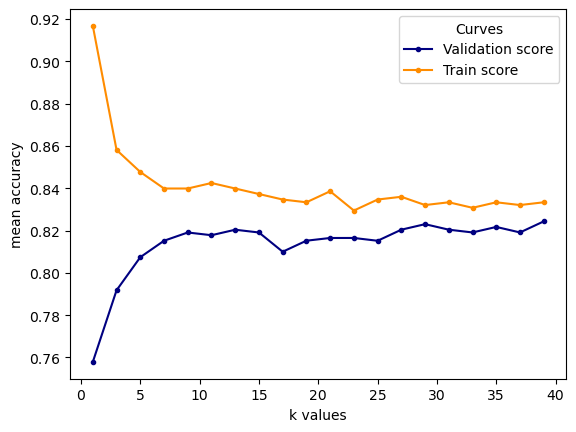

El valor k óptimo es: 39


In [8]:
# Copiar los datos para evitar modificar los originales
X_train_std = np.copy(X_train)
X_test_std = np.copy(X_test)


# Estandarizar TRAIN y TEST usando el mismo scaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_std)
X_test_std = scaler.fit_transform(X_test_std)

k_values = range(1, 41, 2)
mean_scores = []
scores_train = []

for k in k_values:
    # Entrenar y evaluar el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_std, np.ravel(y_train), cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    
    model = knn.fit(X_train_std, np.ravel(y_train))
    score = model.score(X_train_std, y_train)
    scores_train.append(score)

# Graficar las curvas de validación y entrenamiento
fig, ax = plt.subplots()
ax.plot(k_values, mean_scores, color="navy", label="Validation score", marker='.')
ax.plot(k_values, scores_train, color="darkorange", label="Train score", marker='.')
ax.legend(loc="best", title="Curves", frameon=True)
plt.xlabel('k values')
plt.ylabel('mean accuracy')
plt.show()

# Encontrar el valor k óptimo
optimal_k = k_values[np.argmax(mean_scores)]
print('El valor k óptimo es:', optimal_k)


In [9]:
# Entrenar el modelo con el valor óptimo de k
model = KNeighborsClassifier(n_neighbors=optimal_k)
predict = model.fit(X_train_std, np.ravel(y_train)).predict(X_test_std)

In [10]:
# Calcular la exactitud en los conjuntos de entrenamiento y prueba
acc_train = accuracy_score(y_train, model.predict(X_train_std)).round(4)
acc_test = accuracy_score(y_test, predict).round(4)

# Imprimir la exactitud en los conjuntos de entrenamiento y prueba
print(f'Exactitud en el conjunto de entrenamiento: {acc_train}')
print(f'Exactitud en el conjunto de prueba: {acc_test}\n')

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(confusion_matrix(y_test, predict), '\n')

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, predict))



Exactitud en el conjunto de entrenamiento: 0.8333
Exactitud en el conjunto de prueba: 0.8238

Matriz de Confusión:
[[97 17]
 [17 62]] 

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       114
           1       0.78      0.78      0.78        79

    accuracy                           0.82       193
   macro avg       0.82      0.82      0.82       193
weighted avg       0.82      0.82      0.82       193



In [11]:
# Calcular el reporte de clasificación
report = classification_report(y_test, predict, output_dict=True)

# Extraer la precisión y la recuperación ponderadas promedio
prec = round(report['weighted avg']['precision'], 4)
rec = round(report['weighted avg']['recall'], 4)

# Actualizar el DataFrame comp con los valores calculados
comp.loc['KNN', ('Acc test', 'Acc train', 'Precision', 'Recall')] = (acc_test, acc_train, prec, rec)

## ÁRBOLES DE CLASIFICACIÓN

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Definir el modelo
model = DecisionTreeClassifier()

# Definir los rangos de parámetros a probar
max_depth = range(1, 20)
min_samples_leaf = range(10, 100)

# Definir el diccionario de parámetros
param_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Entrenar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_parameters = grid_search.best_params_
print('Los parámetros seleccionados por la búsqueda en cuadrícula son:', best_parameters)

# Realizar predicciones con el mejor modelo encontrado
predict = grid_search.predict(X_test)

Los parámetros seleccionados por la búsqueda en cuadrícula son: {'max_depth': 8, 'min_samples_leaf': 11}


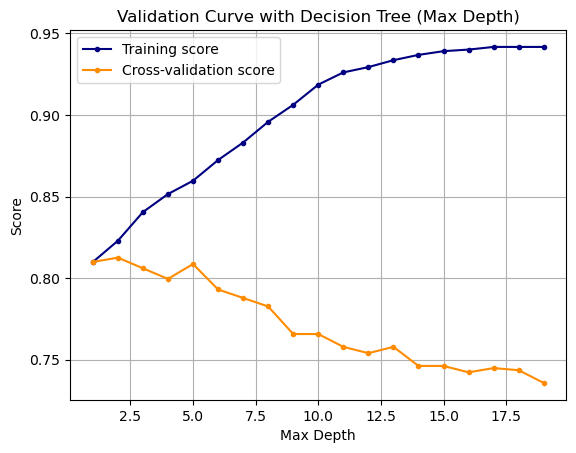

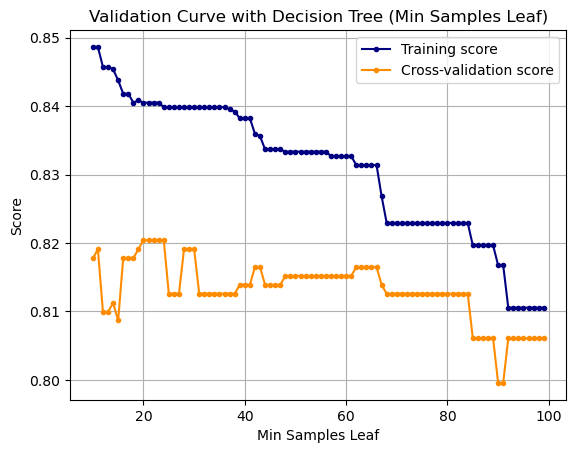

In [14]:
# Validación de la curva para el parámetro "max_depth"
train_scores, test_scores = validation_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=max_depth,
    cv=5,
    scoring="accuracy"
)

# Calcular la media de los puntajes de entrenamiento y prueba para cada valor de max_depth
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de validación para max_depth
plt.figure()
plt.title("Validation Curve with Decision Tree (Max Depth)")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.plot(max_depth, train_scores_mean, label="Training score", color="navy", marker='.')
plt.plot(max_depth, test_scores_mean, label="Cross-validation score", color="darkorange", marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()

# Validación de la curva para el parámetro "min_samples_leaf"
train_scores, test_scores = validation_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    param_name="min_samples_leaf",
    param_range=min_samples_leaf,
    cv=5,
    scoring="accuracy"
)

# Calcular la media de los puntajes de entrenamiento y prueba para cada valor de min_samples_leaf
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar la curva de validación para min_samples_leaf
plt.figure()
plt.title("Validation Curve with Decision Tree (Min Samples Leaf)")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Score")
plt.plot(min_samples_leaf, train_scores_mean, label="Training score", color="navy", marker='.')
plt.plot(min_samples_leaf, test_scores_mean, label="Cross-validation score", color="darkorange", marker='.')
plt.grid()
plt.legend(loc="best")
plt.show()


In [15]:
# Calcular la exactitud en los conjuntos de entrenamiento y prueba
acc_test = grid_search.score(X_test, y_test).round(4)
acc_train = grid_search.score(X_train, y_train).round(4)


# Imprimir la exactitud en los conjuntos de entrenamiento y prueba
print(f'Exactitud en el conjunto de entrenamiento: {acc_train}')
print(f'Exactitud en el conjunto de prueba: {acc_test}\n')

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(confusion_matrix(y_test, predict), '\n')

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, predict))

Exactitud en el conjunto de entrenamiento: 0.8464
Exactitud en el conjunto de prueba: 0.8446

Matriz de Confusión:
[[102  12]
 [ 18  61]] 

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.84      0.77      0.80        79

    accuracy                           0.84       193
   macro avg       0.84      0.83      0.84       193
weighted avg       0.84      0.84      0.84       193



In [16]:
# Calcular el reporte de clasificación
report = classification_report(y_test, predict, output_dict=True)

# Extraer la precisión y la recuperación ponderadas promedio
prec = round(report['weighted avg']['precision'], 4)
rec = round(report['weighted avg']['recall'], 4)

# Actualizar el DataFrame comp con los valores calculados
comp.loc['Árbol de decisión', ('Acc test', 'Acc train', 'Precision', 'Recall')] = (acc_test, acc_train, prec, rec)

## NAIVE BAYES

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
# Crear y entrenar el modelo Naive Bayes
model = GaussianNB(var_smoothing=1)
prediction = model.fit(X_train, np.ravel(y_train)).predict(X_test)

# Calcular y mostrar la exactitud en los conjuntos de entrenamiento y prueba
acc_test = model.score(X_test, y_test).round(4)
acc_train = model.score(X_train, y_train).round(4)
print('La exactitud para el modelo de Naive Bayes en el conjunto de TEST es:', acc_test)
print('La exactitud para el modelo de Naive Bayes en el conjunto de TRAIN es:', acc_train)

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(confusion_matrix(y_test, predict), '\n')

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, predict))

La exactitud para el modelo de Naive Bayes en el conjunto de TEST es: 0.6788
La exactitud para el modelo de Naive Bayes en el conjunto de TRAIN es: 0.6953
Matriz de Confusión:
[[102  12]
 [ 18  61]] 

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.84      0.77      0.80        79

    accuracy                           0.84       193
   macro avg       0.84      0.83      0.84       193
weighted avg       0.84      0.84      0.84       193



In [19]:
# Calcular el reporte de clasificación
report = classification_report(y_test, predict, output_dict=True)

# Extraer la precisión y la recuperación ponderadas promedio
prec = round(report['weighted avg']['precision'], 4)
rec = round(report['weighted avg']['recall'], 4)

# Actualizar el DataFrame comp con los valores calculados
comp.loc['Naive Bayes', ('Acc test', 'Acc train', 'Precision', 'Recall')] = (acc_test, acc_train, prec, rec)

## COMPARACIÓN DE RESULTADOS

En la siguiente tabla se muestra una relación de las prestaciones de cada clasificador.

In [20]:
comp

,Acc test,Acc train,Precision,Recall
Regresión logística,0.8342,0.8359,0.8337,0.8342
KNN,0.8238,0.8333,0.8238,0.8238
Árbol de decisión,0.8446,0.8464,0.8441,0.8446
Naive Bayes,0.6788,0.6953,0.8441,0.8446
